CHARGEMENT DES DONNÉES
Using Colab cache for faster access to the 'students-academic-performance-dataset' dataset.

Dimensions du dataset: (1000, 8)

Premières lignes:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78         

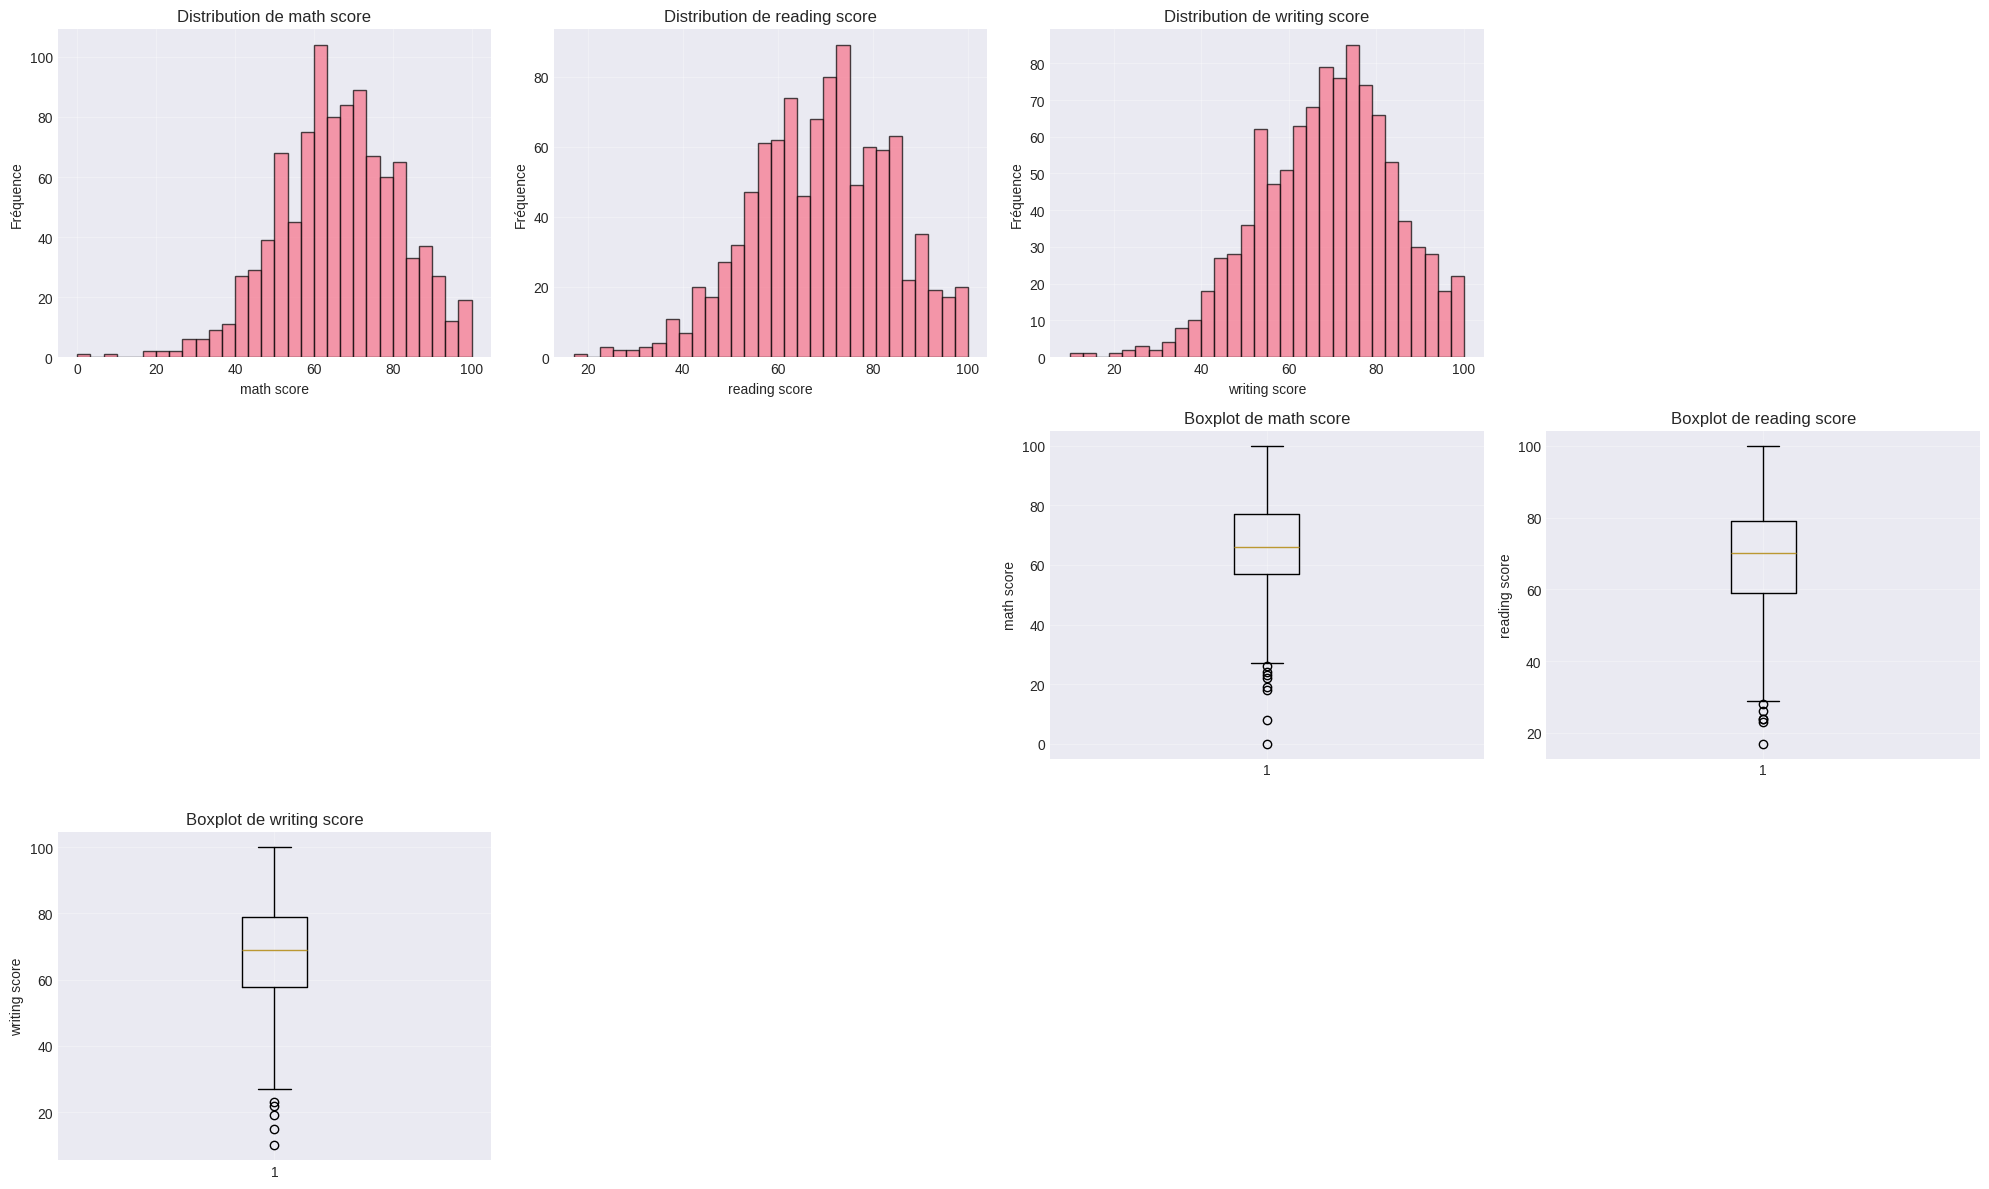

✓ Graphique des variables catégorielles sauvegardé: analyse_categoriques.png


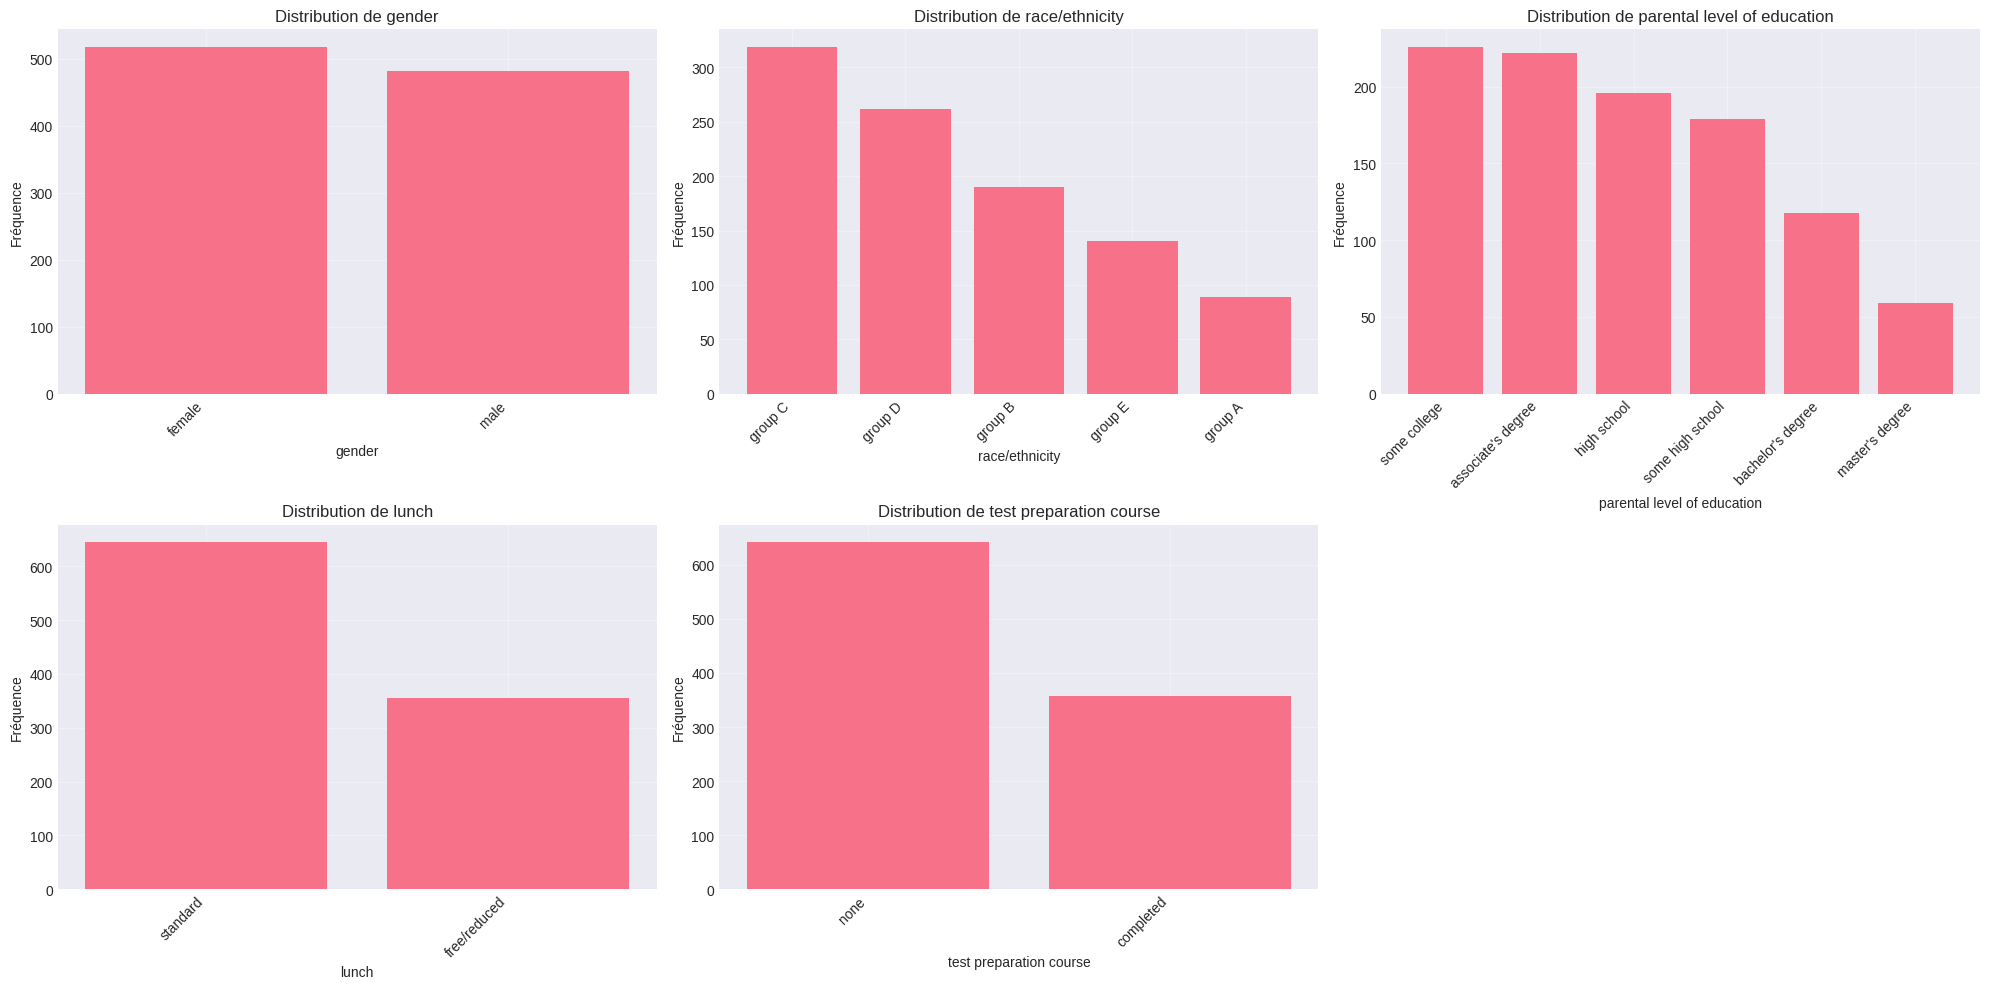


3. MATRICE DE CORRÉLATION

✓ Matrice de corrélation sauvegardée: matrice_correlation.png


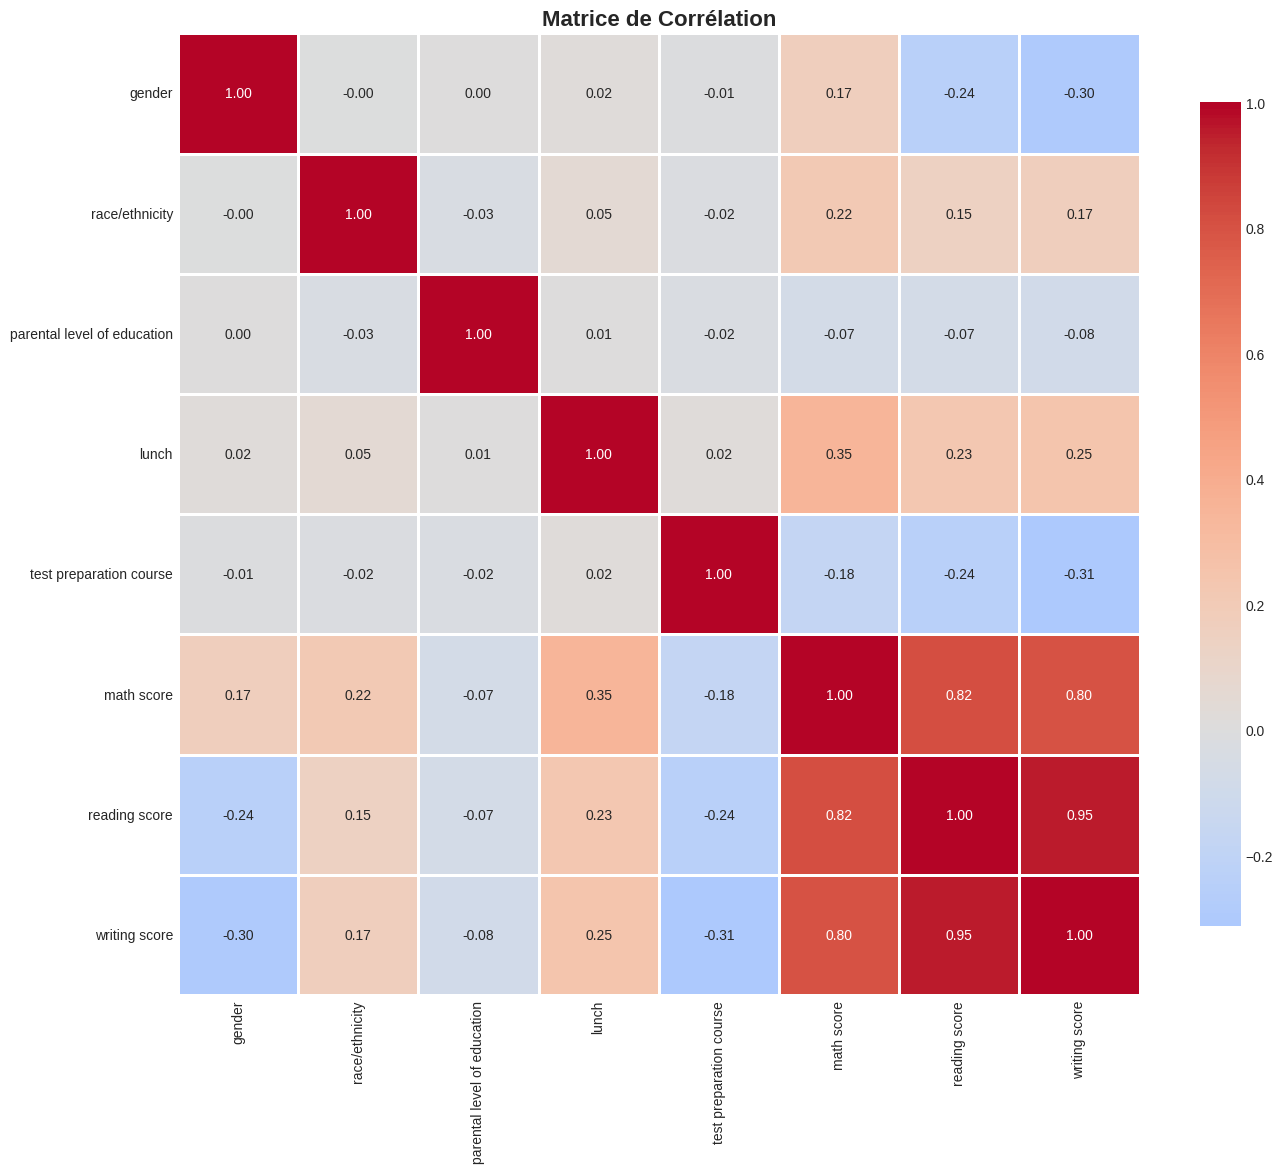


Top 10 des corrélations les plus fortes (hors diagonale):
reading score <-> writing score: 0.955
math score <-> reading score: 0.818
math score <-> writing score: 0.803
lunch <-> math score: 0.351
test preparation course <-> writing score: -0.313
gender <-> writing score: -0.301
lunch <-> writing score: 0.246
gender <-> reading score: -0.244
test preparation course <-> reading score: -0.242
lunch <-> reading score: 0.230

4. RÉGRESSION LINÉAIRE

Variable cible pour la régression linéaire: writing score

Résultats de la régression linéaire:
R² (Train): 0.9418
R² (Test): 0.9312
MSE (Train): 13.2372
MSE (Test): 16.5880
RMSE (Test): 4.0728

✓ Graphique de régression linéaire sauvegardé: regression_lineaire.png


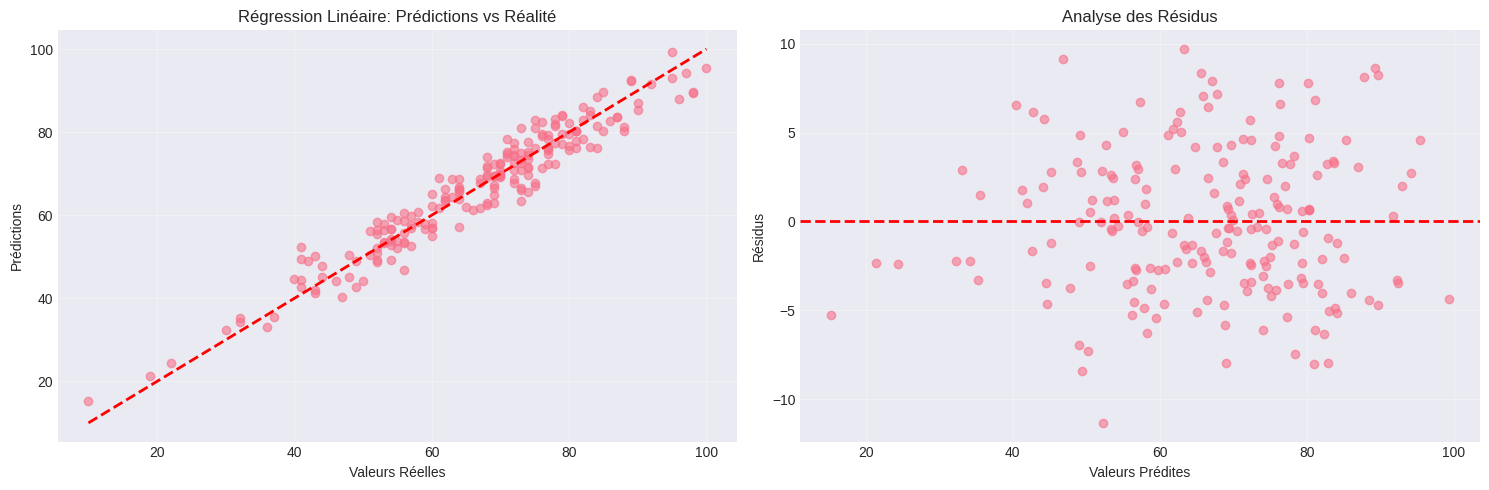


Top 10 des features les plus importantes:
                       Feature  Coefficient  Abs_Coefficient
6                reading score     9.964075         9.964075
5                   math score     3.986594         3.986594
0                       gender    -2.784804         2.784804
4      test preparation course    -1.567604         1.567604
2  parental level of education    -0.382715         0.382715
3                        lunch     0.181627         0.181627
1               race/ethnicity     0.079581         0.079581

5. RÉGRESSION LOGISTIQUE

Variable cible binaire créée (> médiane: 69.00)
Distribution: {0: 511, 1: 489}

Résultats de la régression logistique:
Accuracy (Train): 0.9150
Accuracy (Test): 0.9300

Rapport de classification (Test):
              precision    recall  f1-score   support

    Classe 0       0.92      0.94      0.93       102
    Classe 1       0.94      0.92      0.93        98

    accuracy                           0.93       200
   macro avg       0.

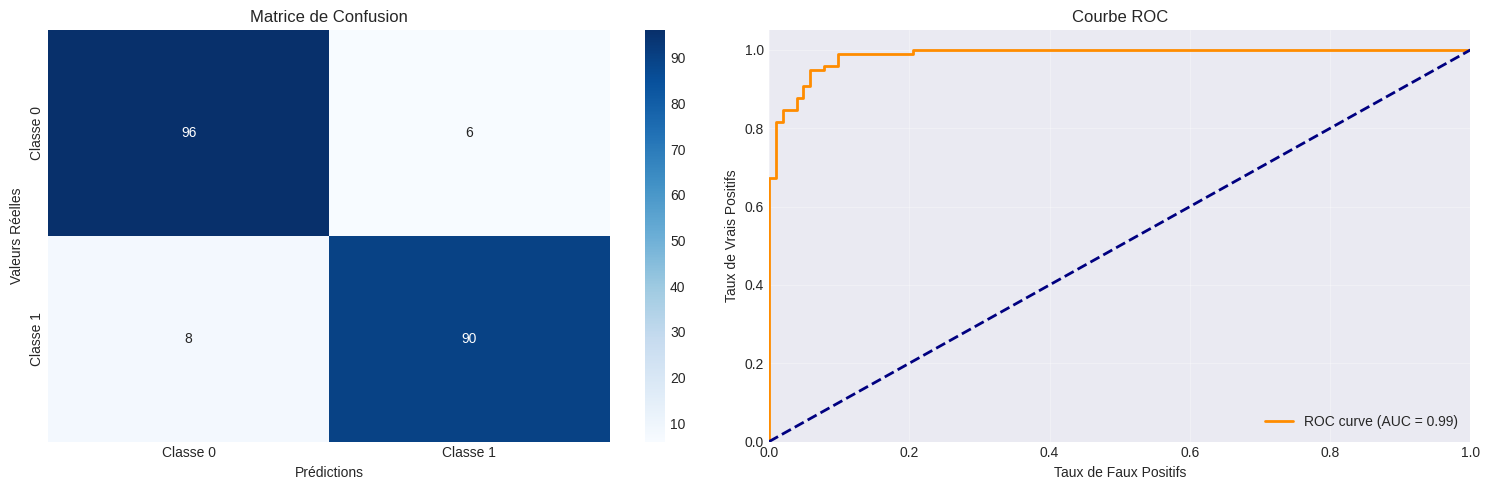


6. RÉSUMÉ DE L'ANALYSE

Analyse Complète Terminée!

Dataset:
- Dimensions finales: (1000, 8)
- Variables numériques: 3
- Variables catégorielles: 5

Régression Linéaire:
- Variable cible: writing score
- R² (Test): 0.9312
- RMSE (Test): 4.0728

Régression Logistique:
- Accuracy (Test): 0.9300
- AUC-ROC: 0.9870

Fichiers générés:
✓ analyse_distributions.png
✓ analyse_categoriques.png
✓ matrice_correlation.png
✓ regression_lineaire.png
✓ regression_logistique.png



In [2]:
# ============================================================================
# ANALYSE COMPLÈTE DU DATASET STUDENTS ACADEMIC PERFORMANCE
# ============================================================================
# Ce script effectue une analyse complète des performances académiques des étudiants
# incluant le nettoyage, la visualisation, et la modélisation prédictive
# ============================================================================

# Installation des dépendances nécessaires (à exécuter une seule fois)
# pip install kagglehub pandas numpy matplotlib seaborn scikit-learn

# ----------------------------------------------------------------------------
# IMPORTATION DES BIBLIOTHÈQUES
# ----------------------------------------------------------------------------
import kagglehub  # Pour télécharger les datasets depuis Kaggle
from kagglehub import KaggleDatasetAdapter
import pandas as pd  # Pour la manipulation des données
import numpy as np  # Pour les calculs numériques
import matplotlib.pyplot as plt  # Pour créer des graphiques
import seaborn as sns  # Pour des visualisations statistiques avancées
from sklearn.model_selection import train_test_split  # Pour diviser les données en train/test
from sklearn.linear_model import LinearRegression, LogisticRegression  # Modèles de régression
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Pour encoder et normaliser les données
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')  # Ignorer les avertissements pour un affichage plus propre

# Configuration de l'apparence des graphiques
plt.style.use('seaborn-v0_8-darkgrid')  # Style visuel pour les graphiques
sns.set_palette("husl")  # Palette de couleurs harmonieuse

print("="*80)
print("CHARGEMENT DES DONNÉES")
print("="*80)

# ----------------------------------------------------------------------------
# ÉTAPE 0: CHARGEMENT DU DATASET DEPUIS KAGGLE
# ----------------------------------------------------------------------------
# Objectif: Télécharger et charger le dataset des performances académiques
# Le dataset contient des informations sur les étudiants et leurs résultats
# ----------------------------------------------------------------------------
file_path = "StudentsPerformance.csv"  # Corrected filename based on `!ls` output
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,  # Charger directement en DataFrame pandas
    "sadiajavedd/students-academic-performance-dataset",  # Identifiant du dataset sur Kaggle
    file_path  # Use the corrected file_path
)

# Afficher les premières informations du dataset
print(f"\nDimensions du dataset: {df.shape}")  # Nombre de lignes et colonnes
print(f"\nPremières lignes:\n{df.head()}")  # Aperçu des 5 premières lignes

# ============================================================================
# 1. NETTOYAGE DES DONNÉES
# ============================================================================
# Objectif: Préparer les données pour l'analyse en traitant les problèmes
# de qualité (valeurs manquantes, doublons, incohérences)
# Cette étape est CRUCIALE car des données de mauvaise qualité mènent
# à des analyses et modèles incorrects
# ============================================================================
print("\n" + "="*80)
print("1. NETTOYAGE DES DONNÉES")
print("="*80)

# ----------------------------------------------------------------------------
# 1.1 INSPECTION DU DATASET
# ----------------------------------------------------------------------------
# Objectif: Comprendre la structure et les types de données
print("\nInformations sur le dataset:")
print(df.info())  # Affiche: types de colonnes, nombre de valeurs non-nulles, mémoire utilisée

# ----------------------------------------------------------------------------
# 1.2 DÉTECTION DES VALEURS MANQUANTES
# ----------------------------------------------------------------------------
# Objectif: Identifier les colonnes avec des données manquantes
# Les valeurs manquantes peuvent biaiser les analyses et empêcher certains modèles
print("\nValeurs manquantes par colonne:")
missing_values = df.isnull().sum()  # Compter les NaN dans chaque colonne
print(missing_values[missing_values > 0])  # Afficher seulement les colonnes avec des NaN

# ----------------------------------------------------------------------------
# 1.3 TRAITEMENT DES VALEURS MANQUANTES
# ----------------------------------------------------------------------------
# Objectif: Remplacer les valeurs manquantes par des valeurs appropriées
# Stratégie:
# - Variables numériques → médiane (robuste aux valeurs extrêmes)
# - Variables catégorielles → mode (valeur la plus fréquente)
if df.isnull().sum().sum() > 0:  # S'il y a au moins une valeur manquante
    # Pour les colonnes numériques: utiliser la médiane
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
            # La médiane est préférée à la moyenne car moins sensible aux valeurs extrêmes

    # Pour les colonnes catégorielles: utiliser le mode (valeur la plus fréquente)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
            # Le mode préserve la distribution naturelle des catégories

# ----------------------------------------------------------------------------
# 1.4 DÉTECTION ET SUPPRESSION DES DOUBLONS
# ----------------------------------------------------------------------------
# Objectif: Éviter de compter plusieurs fois les mêmes observations
# Les doublons peuvent fausser les statistiques et surajuster les modèles
duplicates = df.duplicated().sum()  # Compter les lignes exactement identiques
print(f"\nNombre de doublons: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()  # Supprimer les doublons
    print(f"Doublons supprimés. Nouvelles dimensions: {df.shape}")

# ----------------------------------------------------------------------------
# 1.5 STATISTIQUES DESCRIPTIVES
# ----------------------------------------------------------------------------
# Objectif: Résumer les caractéristiques principales des variables numériques
# Permet de détecter des anomalies (valeurs min/max étranges, écart-types élevés)
print("\nStatistiques descriptives:")
print(df.describe())  # Moyenne, écart-type, min, max, quartiles pour chaque colonne numérique

# ============================================================================
# 2. ANALYSE EXPLORATOIRE AVEC GRAPHIQUES
# ============================================================================
# Objectif: Visualiser les données pour comprendre leur distribution,
# détecter les patterns, et identifier les valeurs aberrantes
# La visualisation permet de comprendre intuitivement ce que les statistiques
# nous disent et de découvrir des insights cachés
# ============================================================================
print("\n" + "="*80)
print("2. ANALYSE EXPLORATOIRE")
print("="*80)

# Créer une grande figure pour organiser plusieurs graphiques
fig = plt.figure(figsize=(20, 12))  # Taille 20x12 pouces pour une bonne lisibilité

# ----------------------------------------------------------------------------
# 2.1 DISTRIBUTION DES VARIABLES NUMÉRIQUES (HISTOGRAMMES)
# ----------------------------------------------------------------------------
# Objectif: Comprendre comment les valeurs sont réparties pour chaque variable
# - Distribution normale (en cloche) → moyennes significatives
# - Distribution asymétrique → médiane plus appropriée
# - Distribution bimodale → possibles sous-groupes
numeric_columns = df.select_dtypes(include=[np.number]).columns
n_numeric = len(numeric_columns)

for i, col in enumerate(numeric_columns[:6], 1):  # Afficher jusqu'à 6 variables
    plt.subplot(3, 4, i)  # Grille de 3 lignes x 4 colonnes
    plt.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    # bins=30: diviser les données en 30 intervalles
    # edgecolor: contour noir pour mieux distinguer les barres
    # alpha=0.7: transparence pour un meilleur rendu visuel
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')  # Nombre d'observations dans chaque intervalle
    plt.grid(True, alpha=0.3)  # Grille légère pour faciliter la lecture

# ----------------------------------------------------------------------------
# 2.2 BOXPLOTS POUR DÉTECTER LES VALEURS ABERRANTES (OUTLIERS)
# ----------------------------------------------------------------------------
# Objectif: Identifier les valeurs extrêmes qui pourraient être des erreurs
# ou des cas exceptionnels nécessitant une attention particulière
# Un boxplot montre: médiane, quartiles, et valeurs aberrantes (points isolés)
for i, col in enumerate(numeric_columns[:6], 7):  # Continuer dans la même grille
    if i <= 12:
        plt.subplot(3, 4, i)
        plt.boxplot(df[col].dropna())
        # La boîte contient 50% des données (Q1 à Q3)
        # Les moustaches s'étendent jusqu'à 1.5*IQR
        # Les points au-delà sont des valeurs aberrantes potentielles
        plt.title(f'Boxplot de {col}')
        plt.ylabel(col)
        plt.grid(True, alpha=0.3)

plt.tight_layout()  # Ajuster automatiquement l'espacement entre les graphiques
plt.savefig('analyse_distributions.png', dpi=300, bbox_inches='tight')
# dpi=300: haute résolution pour impression/présentation
print("\n✓ Graphique des distributions sauvegardé: analyse_distributions.png")
plt.show()

# ----------------------------------------------------------------------------
# 2.3 ANALYSE DES VARIABLES CATÉGORIELLES (DIAGRAMMES EN BARRES)
# ----------------------------------------------------------------------------
# Objectif: Visualiser la fréquence de chaque catégorie
# Permet d'identifier les catégories dominantes et les déséquilibres de classes
categorical_columns = df.select_dtypes(include=['object']).columns

if len(categorical_columns) > 0:
    n_cat = min(len(categorical_columns), 6)  # Maximum 6 graphiques
    fig = plt.figure(figsize=(20, 10))

    for i, col in enumerate(categorical_columns[:n_cat], 1):
        plt.subplot(2, 3, i)  # Grille 2x3
        value_counts = df[col].value_counts()  # Compter les occurrences de chaque catégorie
        plt.bar(range(len(value_counts)), value_counts.values)
        plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
        # rotation=45: incliner les étiquettes pour éviter le chevauchement
        plt.title(f'Distribution de {col}')
        plt.xlabel(col)
        plt.ylabel('Fréquence')
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('analyse_categoriques.png', dpi=300, bbox_inches='tight')
    print("✓ Graphique des variables catégorielles sauvegardé: analyse_categoriques.png")
    plt.show()

# ============================================================================
# 3. MATRICE DE CORRÉLATION
# ============================================================================
print("\n" + "="*80)
print("3. MATRICE DE CORRÉLATION")
print("="*80)

# Encoder les variables catégorielles pour l'analyse de corrélation
df_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Calculer la matrice de corrélation
correlation_matrix = df_encoded.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('matrice_correlation.png', dpi=300, bbox_inches='tight')
print("\n✓ Matrice de corrélation sauvegardée: matrice_correlation.png")
plt.show()

# Identifier les corrélations les plus fortes
print("\nTop 10 des corrélations les plus fortes (hors diagonale):")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in corr_pairs_sorted[:10]:
    print(f"{var1} <-> {var2}: {corr:.3f}")

# ============================================================================
# 4. RÉGRESSION LINÉAIRE
# ============================================================================
print("\n" + "="*80)
print("4. RÉGRESSION LINÉAIRE")
print("="*80)

# Identifier la variable cible pour la régression linéaire
# On suppose que la dernière colonne numérique est la variable cible
# Vous pouvez modifier cela selon votre dataset
target_col_linear = numeric_columns[-1]
print(f"\nVariable cible pour la régression linéaire: {target_col_linear}")

# Préparer les données
X_linear = df_encoded.drop(columns=[target_col_linear])
y_linear = df_encoded[target_col_linear]

# Diviser les données
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

# Standardiser les données
scaler_linear = StandardScaler()
X_train_lin_scaled = scaler_linear.fit_transform(X_train_lin)
X_test_lin_scaled = scaler_linear.transform(X_test_lin)

# Entraîner le modèle de régression linéaire
model_linear = LinearRegression()
model_linear.fit(X_train_lin_scaled, y_train_lin)

# Prédictions
y_pred_lin_train = model_linear.predict(X_train_lin_scaled)
y_pred_lin_test = model_linear.predict(X_test_lin_scaled)

# Évaluation
print(f"\nRésultats de la régression linéaire:")
print(f"R² (Train): {r2_score(y_train_lin, y_pred_lin_train):.4f}")
print(f"R² (Test): {r2_score(y_test_lin, y_pred_lin_test):.4f}")
print(f"MSE (Train): {mean_squared_error(y_train_lin, y_pred_lin_train):.4f}")
print(f"MSE (Test): {mean_squared_error(y_test_lin, y_pred_lin_test):.4f}")
print(f"RMSE (Test): {np.sqrt(mean_squared_error(y_test_lin, y_pred_lin_test)):.4f}")

# Visualiser les résultats
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Graphique des prédictions vs valeurs réelles
axes[0].scatter(y_test_lin, y_pred_lin_test, alpha=0.6)
axes[0].plot([y_test_lin.min(), y_test_lin.max()],
             [y_test_lin.min(), y_test_lin.max()], 'r--', lw=2)
axes[0].set_xlabel('Valeurs Réelles')
axes[0].set_ylabel('Prédictions')
axes[0].set_title('Régression Linéaire: Prédictions vs Réalité')
axes[0].grid(True, alpha=0.3)

# Résidus
residuals = y_test_lin - y_pred_lin_test
axes[1].scatter(y_pred_lin_test, residuals, alpha=0.6)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Valeurs Prédites')
axes[1].set_ylabel('Résidus')
axes[1].set_title('Analyse des Résidus')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_lineaire.png', dpi=300, bbox_inches='tight')
print("\n✓ Graphique de régression linéaire sauvegardé: regression_lineaire.png")
plt.show()

# Importance des features
feature_importance = pd.DataFrame({
    'Feature': X_linear.columns,
    'Coefficient': model_linear.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 des features les plus importantes:")
print(feature_importance.head(10))

# ============================================================================
# 5. RÉGRESSION LOGISTIQUE
# ============================================================================
print("\n" + "="*80)
print("5. RÉGRESSION LOGISTIQUE")
print("="*80)

# Créer une variable cible binaire pour la régression logistique
# On va créer une variable basée sur la médiane de la variable cible
median_value = y_linear.median()
y_binary = (y_linear > median_value).astype(int)
print(f"\nVariable cible binaire créée (> médiane: {median_value:.2f})")
print(f"Distribution: {y_binary.value_counts().to_dict()}")

# Préparer les données
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(
    X_linear, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Standardiser les données
scaler_logistic = StandardScaler()
X_train_log_scaled = scaler_logistic.fit_transform(X_train_log)
X_test_log_scaled = scaler_logistic.transform(X_test_log)

# Entraîner le modèle de régression logistique
model_logistic = LogisticRegression(max_iter=1000, random_state=42)
model_logistic.fit(X_train_log_scaled, y_train_log)

# Prédictions
y_pred_log_train = model_logistic.predict(X_train_log_scaled)
y_pred_log_test = model_logistic.predict(X_test_log_scaled)
y_pred_log_proba = model_logistic.predict_proba(X_test_log_scaled)[:, 1]

# Évaluation
print(f"\nRésultats de la régression logistique:")
print(f"Accuracy (Train): {accuracy_score(y_train_log, y_pred_log_train):.4f}")
print(f"Accuracy (Test): {accuracy_score(y_test_log, y_pred_log_test):.4f}")

print("\nRapport de classification (Test):")
print(classification_report(y_test_log, y_pred_log_test,
                          target_names=['Classe 0', 'Classe 1']))

# Matrice de confusion
cm = confusion_matrix(y_test_log, y_pred_log_test)

# Visualisations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
axes[0].set_title('Matrice de Confusion')
axes[0].set_ylabel('Valeurs Réelles')
axes[0].set_xlabel('Prédictions')

# Courbe ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_log, y_pred_log_proba)
roc_auc = auc(fpr, tpr)

axes[1].plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Taux de Faux Positifs')
axes[1].set_ylabel('Taux de Vrais Positifs')
axes[1].set_title('Courbe ROC')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_logistique.png', dpi=300, bbox_inches='tight')
print("\n✓ Graphique de régression logistique sauvegardé: regression_logistique.png")
plt.show()

# ============================================================================
# 6. RÉSUMÉ FINAL
# ============================================================================
print("\n" + "="*80)
print("6. RÉSUMÉ DE L'ANALYSE")
print("="*80)

print(f"""
Analyse Complète Terminée!

Dataset:
- Dimensions finales: {df.shape}
- Variables numériques: {len(numeric_columns)}
- Variables catégorielles: {len(categorical_columns)}

Régression Linéaire:
- Variable cible: {target_col_linear}
- R² (Test): {r2_score(y_test_lin, y_pred_lin_test):.4f}
- RMSE (Test): {np.sqrt(mean_squared_error(y_test_lin, y_pred_lin_test)):.4f}

Régression Logistique:
- Accuracy (Test): {accuracy_score(y_test_log, y_pred_log_test):.4f}
- AUC-ROC: {roc_auc:.4f}

Fichiers générés:
✓ analyse_distributions.png
✓ analyse_categoriques.png
✓ matrice_correlation.png
✓ regression_lineaire.png
✓ regression_logistique.png
""")